In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tnrange, tqdm_notebook

In [1]:
n_run = 2000
n_step = 1000 
action_space = 10

In [2]:
def average_reward_bandit(epsilon, n_run, n_step, zero_initial=True):
    total_Q_plot = np.zeros((n_run, n_step))
    for run in tnrange(n_run, desc='total runs'):
        if zero_initial:
            Q = np.zeros((action_space))
        else:
            Q = np.full((action_space), 5)
        N = np.zeros((action_space))

        mu, sigma = 0, 1
        q_optimal = np.random.normal(mu, sigma, 10)

        Q_plot = []
        Reward_sum = 0
        for i in range(n_step):
            p = np.random.uniform(0, 1)
            max_val = np.max(Q)
            max_pos = [i for i, value in enumerate(Q) if value == max_val]
            if p > (1 - epsilon):
                action = np.random.choice(max_pos)
            else:
                action = np.random.randint(len(Q))

            reward = np.random.normal(q_optimal[action], 1, 1)[0]
            Reward_sum += reward
            N[action] += 1
            Q[action] += 1/N[action]*(reward - Q[action])
            Q_plot.append(Reward_sum/(i+1))
        total_Q_plot[run, :] = Q_plot 
    average_reward = np.mean(total_Q_plot, axis=0)   
    return average_reward

In [119]:
average_reward_greedy = average_reward_bandit(epsilon=0, n_run=n_run, n_step=n_step)

In [120]:
average_reward_e_01 = average_reward_bandit(epsilon=0.1, n_run=n_run, n_step=n_step)

In [121]:
average_reward_e_001 = average_reward_bandit(epsilon=0.01, n_run=n_run, n_step=n_step)

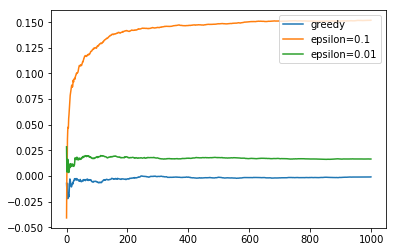

In [125]:
plt.plot(average_reward_greedy)
plt.plot(average_reward_e_01)
plt.plot(average_reward_e_001)
plt.legend(['greedy', 'epsilon=0.1', 'epsilon=0.01'], loc='upper right')
plt.show()

In [5]:
optimistic_greedy = average_reward_bandit(epsilon=0, n_run=2000, n_step=1000, zero_initial=False)

In [6]:
realistic_e_greedy = average_reward_bandit(epsilon=0.1, n_run=2000, n_step=1000, zero_initial=True)

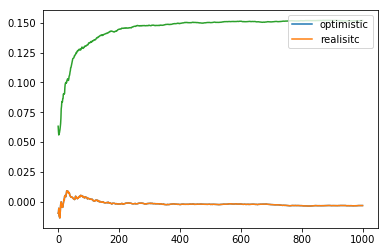

In [9]:
plt.plot(optimistic_greedy)
plt.plot(realistic_e_greedy)
plt.legend(['optimistic', 'realisitc'], loc='upper right')
plt.show()